<a href="https://colab.research.google.com/github/syamkakarla98/Hyperspectral_Image_Analysis_Simplified/blob/master/Articles/Hyperspectral_Image_Analysis%E2%80%8A_%E2%80%8AClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indian Pines Satellite Image Analysis - Classification

You can use this notebook to write the ML pipeline for the classification of Indian pines based on the analysis of satellite images or you can create a folder with different files associated to the different steps of the ML pipeline.

## Import Libraries

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import Random forest classifiers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## Download HSI Data

In [5]:
!ls data

Indian_pines_corrected.mat  Indian_pines_gt.mat


## Read the Data

In [8]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('./data/Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('./data/Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


In [9]:
X

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

[[ 0.6047628   0.21997468  0.8862633  ...  1.28472014  0.38894136
   1.62910551]
 [-1.06326446  0.75820528  0.87074869 ...  1.62021647  1.17937664
   1.62910551]
 [ 2.05583381  0.75820528  0.55657785 ...  1.47643233  1.26720278
   1.06179023]
 ...
 [ 0.55122814 -0.98670358  0.01744517 ... -1.30339441 -0.66497235
  -1.20747086]
 [ 0.55686337  0.05503305 -0.66519764 ... -0.91997003 -0.92845077
  -0.7819844 ]
 [ 1.03022246 -1.00406586 -0.31224028 ... -1.11168222 -1.01627691
  -1.20747086]]
Explained Variance Ratio: [0.6861814  0.19194106 0.0256119  0.01686552 0.01049086 0.00840367
 0.00470794 0.00392647 0.00372137 0.00346936 0.00284682 0.00245588
 0.00214136 0.00197495 0.00185885 0.00180124 0.00174181 0.00158006
 0.00154092 0.00149949]


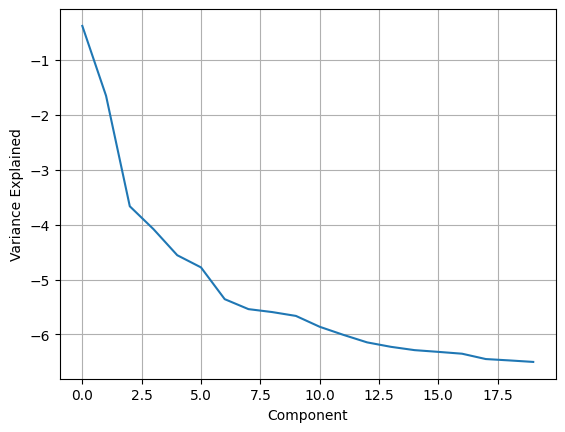

Cumulative Explained Variance:
PC1: 0.6861814043981035
PC2: 0.8781224595972177
PC3: 0.9037343598379078
PC4: 0.9205998778897574
PC5: 0.9310907334098436
PC6: 0.9394944070277744
PC7: 0.9442023475384586
PC8: 0.9481288181939554
PC9: 0.9518501927614831
PC10: 0.9553195503409864
PC11: 0.9581663693510734
PC12: 0.9606222475525978
PC13: 0.9627636052243066
PC14: 0.9647385533250848
PC15: 0.9665974009401
PC16: 0.9683986433855618
PC17: 0.9701404578477109
PC18: 0.9717205144522142
PC19: 0.9732614387517643
PC20: 0.9747609296409114


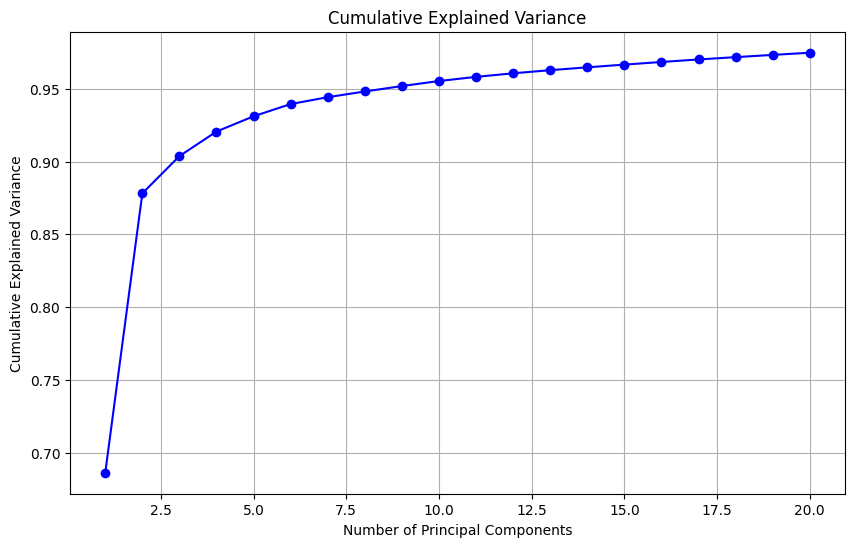

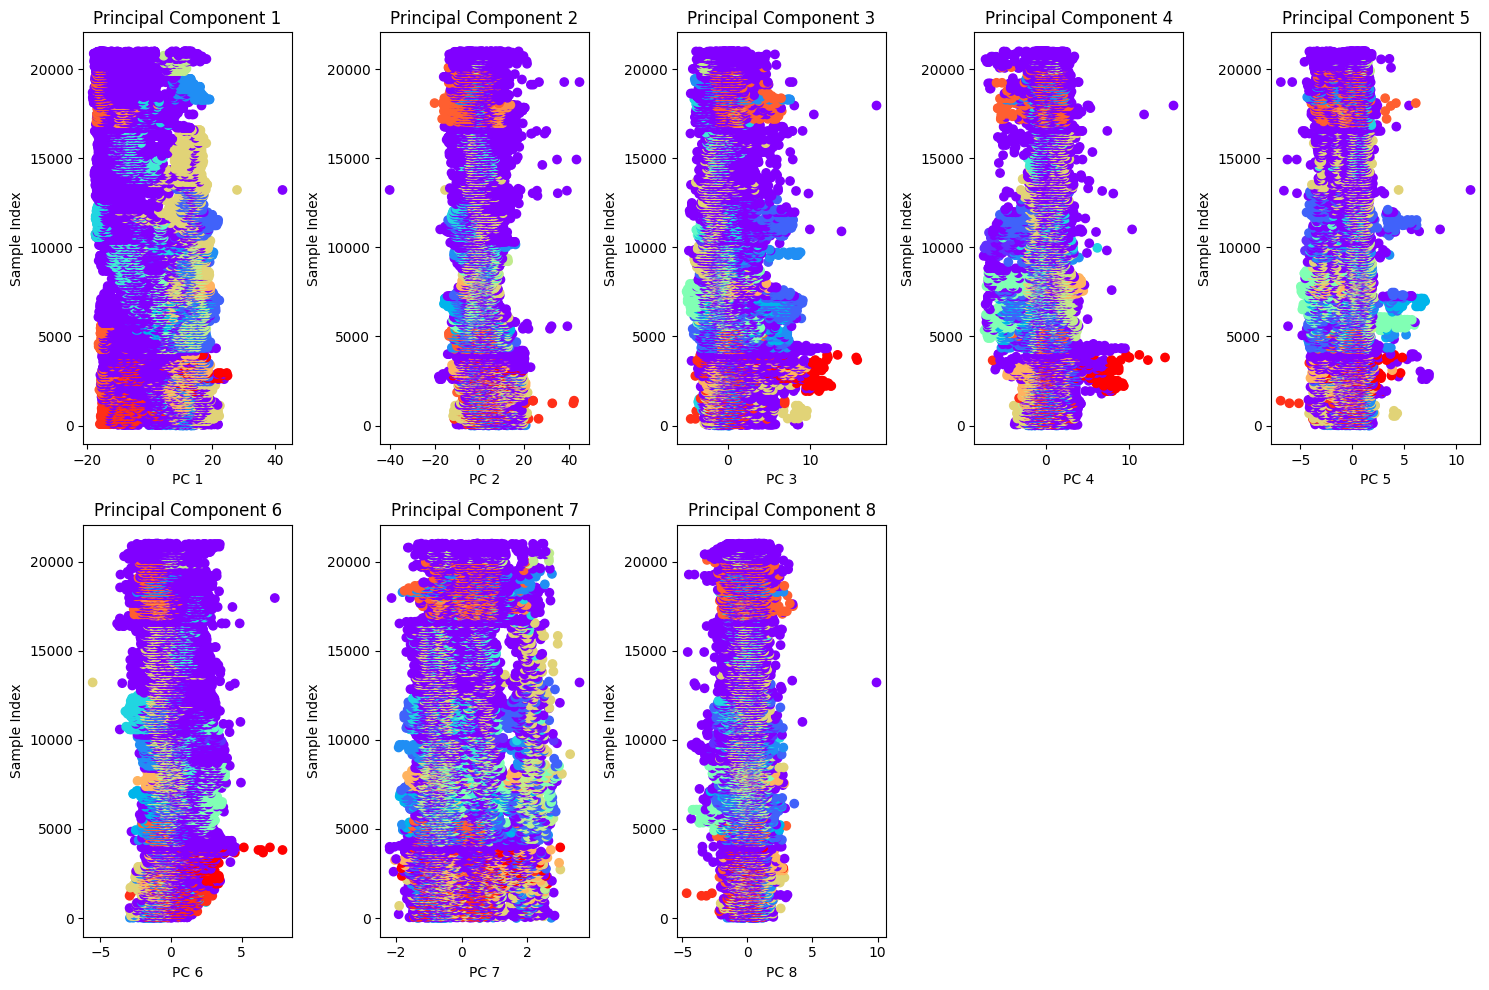

### Visualize Bands

In [1]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

NameError: name 'plt' is not defined

### Visualize the Ground Truth

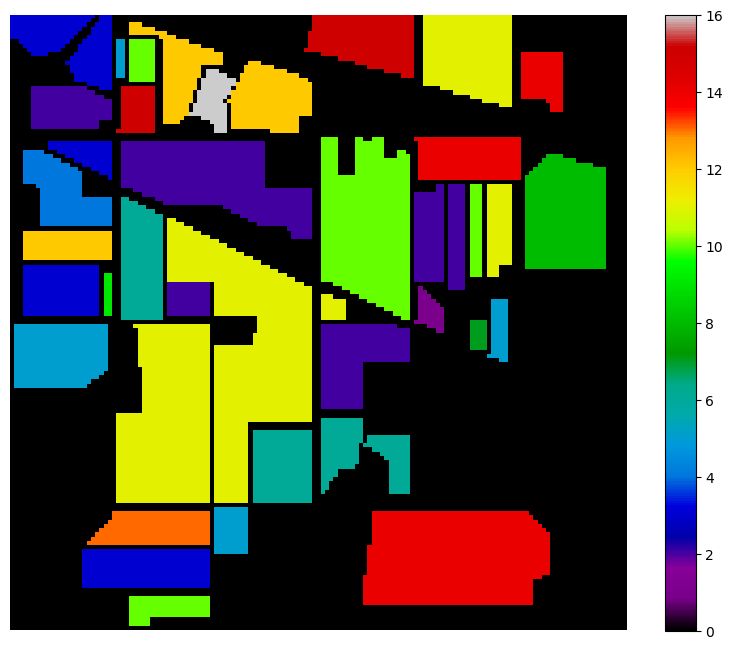

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

## Convert the dataset into csv 

In [19]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)

df


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1013,1012,1018,1015,1011,1001,1000,1009,1008,0
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1012,1014,1012,1024,998,1010,1006,1000,1000,0
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1016,1015,1016,1021,1008,1019,1003,1008,1000,0
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1005,1011,1008,1012,1014,1007,1011,1005,1003,0


In [20]:
df.shape

(21025, 201)

# EDA 

Perform exploratory data analysis on the tabular data

              band1         band2         band3         band4         band5  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    2957.363472   4091.321237   4277.502259   4169.956671   4516.678668   
std      354.918708    230.390005    257.827640    280.761254    346.035984   
min     2560.000000   2709.000000   3649.000000   2810.000000   3840.000000   
25%     2602.000000   3889.000000   4066.000000   3954.000000   4214.000000   
50%     2780.000000   4106.000000   4237.000000   4126.000000   4478.000000   
75%     3179.000000   4247.000000   4479.000000   4350.000000   4772.000000   
max     4536.000000   5744.000000   6361.000000   6362.000000   7153.000000   

              band6         band7         band8         band9        band10  \
count  21025.000000  21025.000000  21025.000000  21025.000000  21025.000000   
mean    4790.595149   4848.317574   4714.732509   4668.904828   4439.065541   
std      414.382138    469.247667    491.728349    

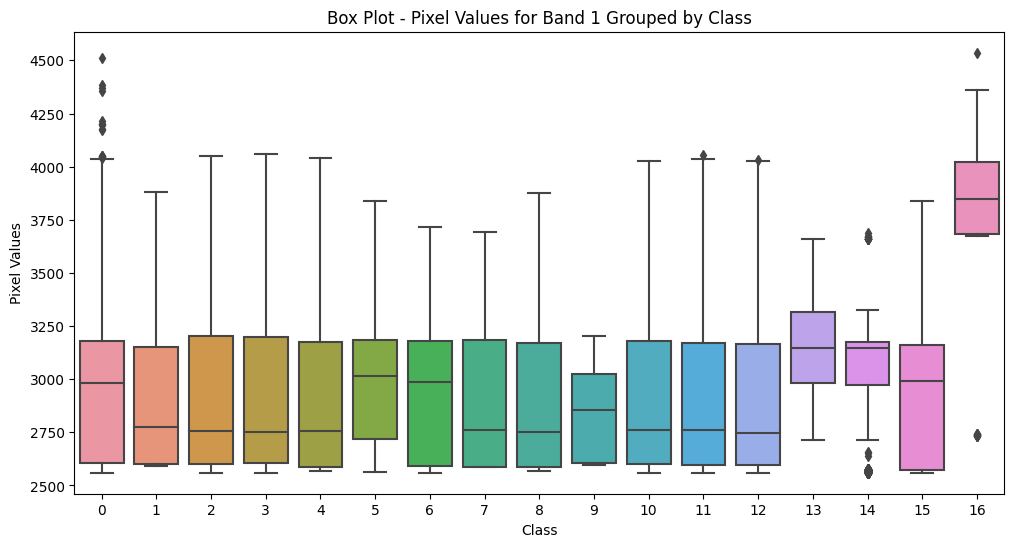

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extraction of pixels 
def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(data=q)
    df = pd.concat([df, pd.DataFrame(data=y.ravel())], axis=1)
    df.columns = [f'band{i}' for i in range(1, 1 + X.shape[2])] + ['class']
    df.to_csv('Dataset.csv', index=False)
    return df

df = extract_pixels(X, y)

# Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)


# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band1')
plt.title('Box Plot - Pixel Values for Band 1 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()


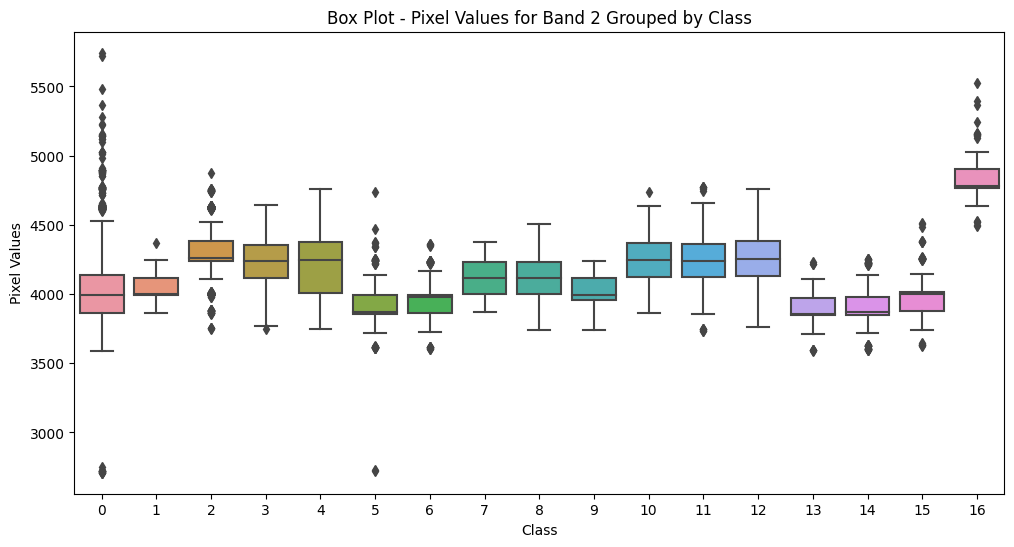

In [30]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band2')
plt.title('Box Plot - Pixel Values for Band 2 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

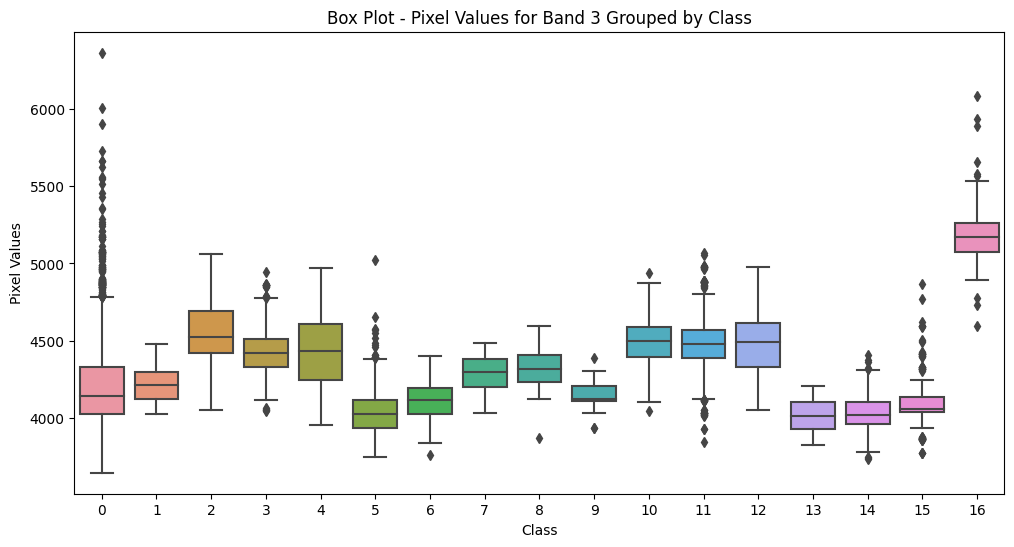

In [32]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band3')
plt.title('Box Plot - Pixel Values for Band 3 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

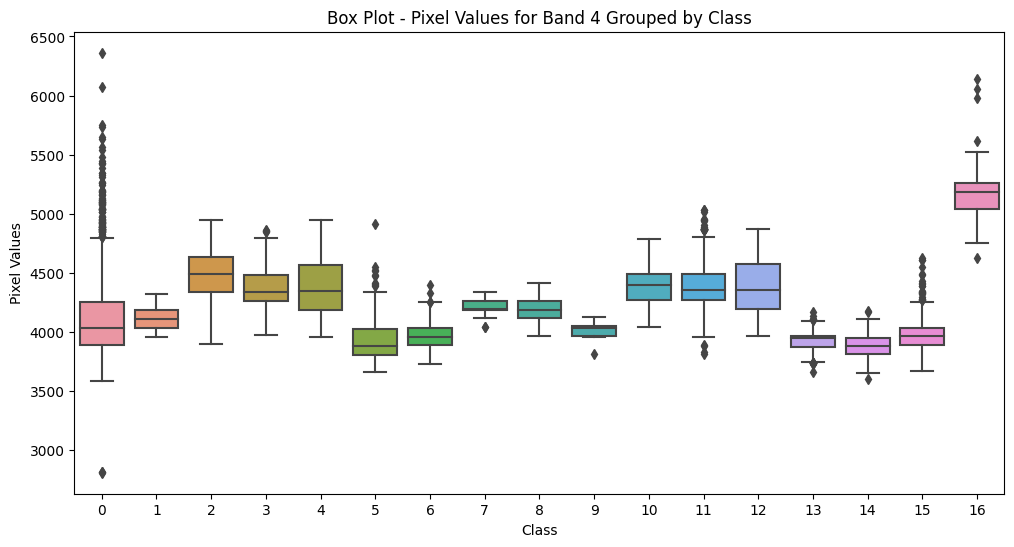

In [33]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band4')
plt.title('Box Plot - Pixel Values for Band 4 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

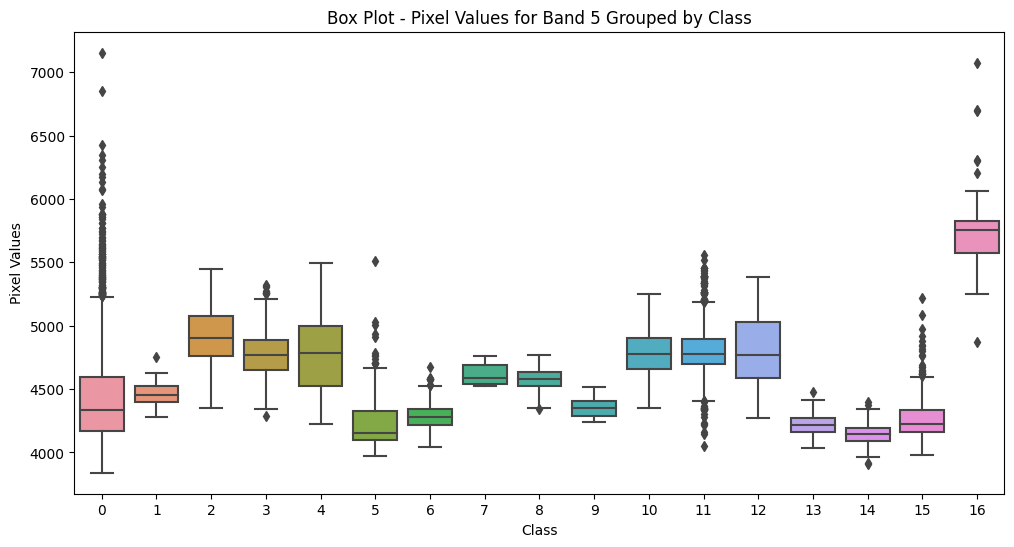

In [34]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band5')
plt.title('Box Plot - Pixel Values for Band 5 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

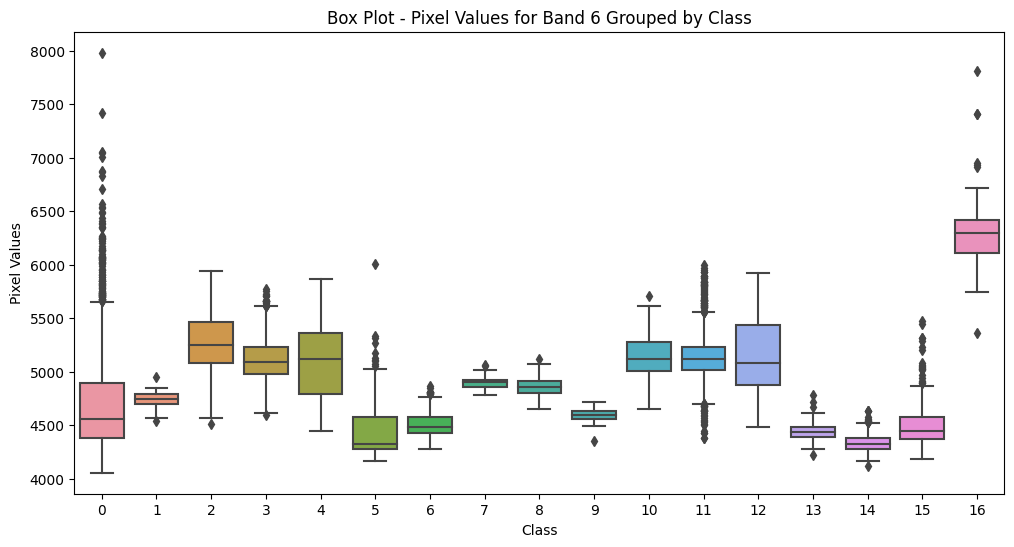

In [35]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band6')
plt.title('Box Plot - Pixel Values for Band 6 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

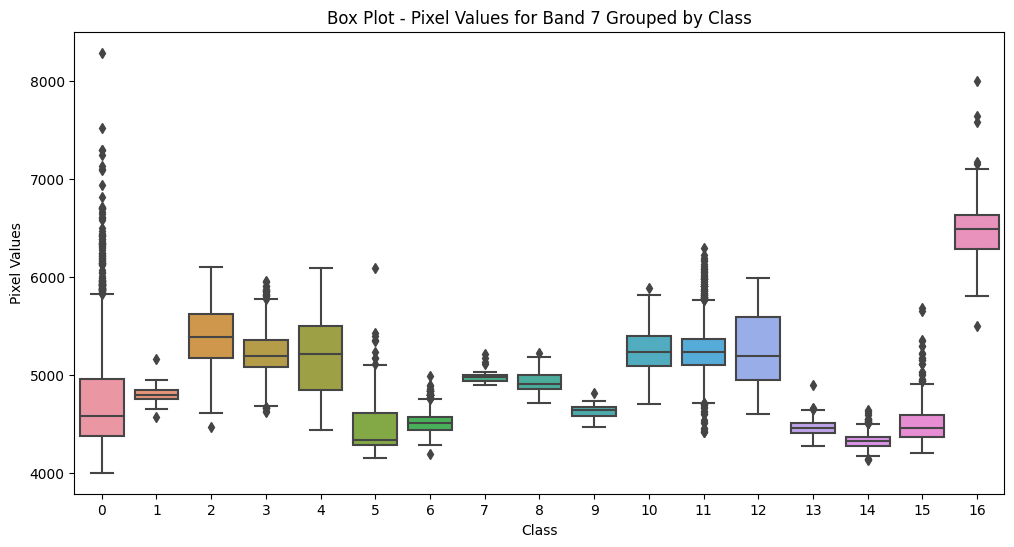

In [37]:
# Box plot for band grouped by object class column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band7')
plt.title('Box Plot - Pixel Values for Band 7 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

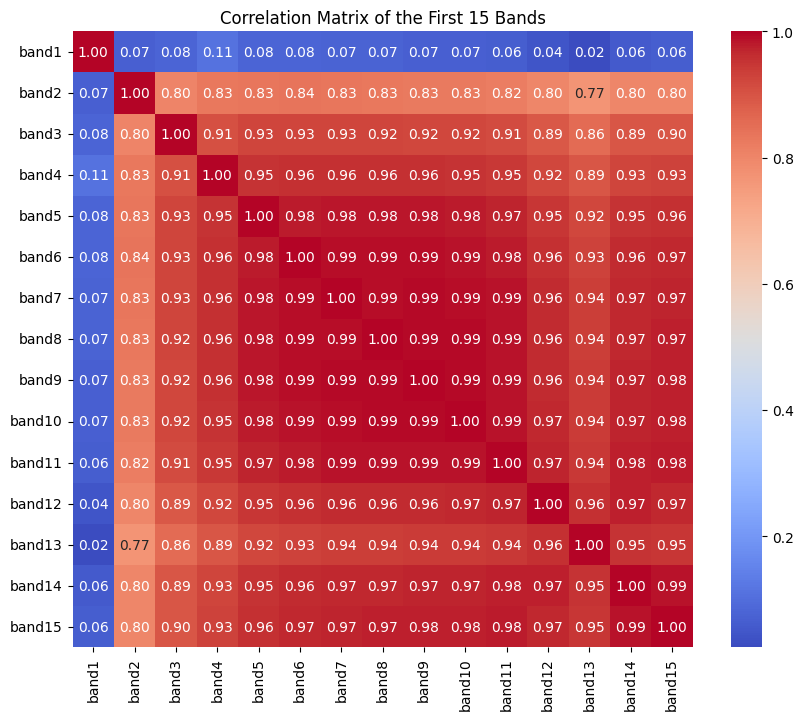

In [43]:
# Extracting pixel values of the first 15 bands for correlation analysis
first_15_bands_df = df.iloc[:, :15]

# Calculating the correlation matrix for the first 10 bands
correlation_matrix_first_15 = first_15_bands_df.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_first_15, cmap='coolwarm', annot=True, fmt=".2f", xticklabels=first_15_bands_df.columns, yticklabels=first_15_bands_df.columns)
plt.title('Correlation Matrix of the First 15 Bands')
plt.show()

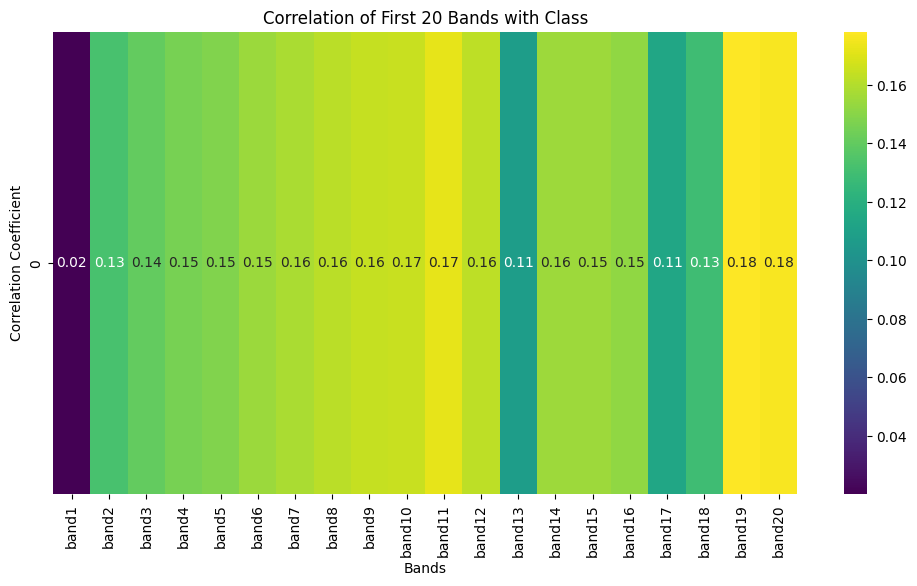

In [77]:
# Extracting pixel values and the 'class' column for the first n bands
n = 20
first_n_bands_and_class_df = df.iloc[:, :n]

# Calculating the correlation matrix with class
correlation_matrix_with_class_first_n = first_n_bands_and_class_df.corrwith(df.iloc[:, -1])

# Visualizing the correlation with class as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_with_class_first_n.to_frame().T, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of First 20 Bands with Class')
plt.xlabel('Bands')
plt.ylabel('Correlation Coefficient')
plt.show()

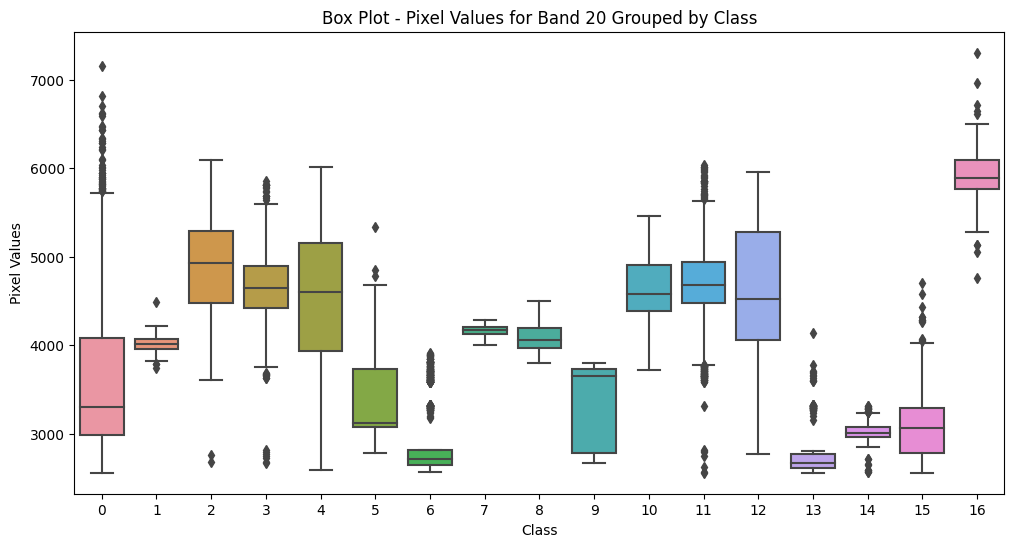

In [50]:
# Box plot for band grouped by object class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band20')
plt.title('Box Plot - Pixel Values for Band 20 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

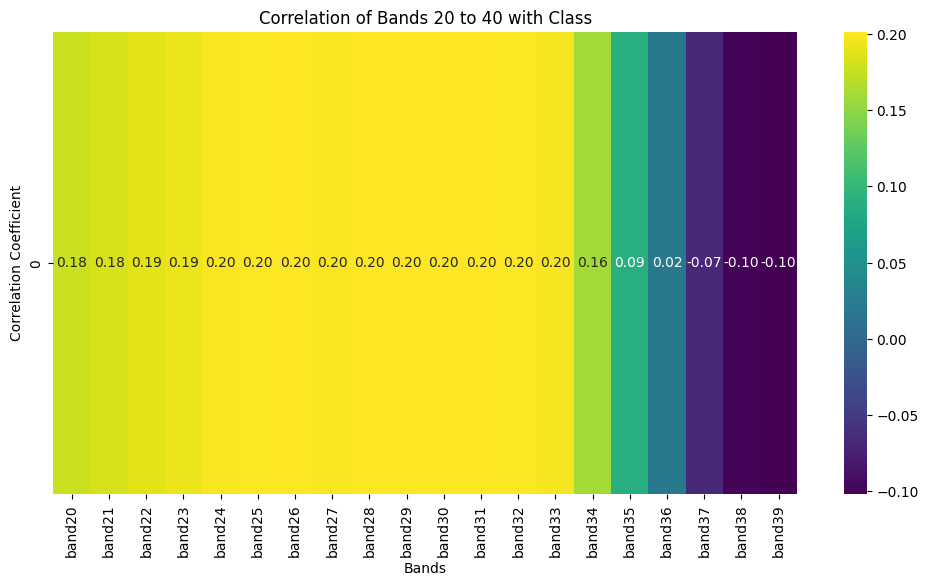

In [53]:
# Extracting pixel values and the 'class' column for bands 20 to 40
bands_20_to_40_and_class_df = df.iloc[:, 19:39]  # Adjust indices as needed

# Calculating the correlation matrix with class column
correlation_matrix_with_class_20_to_40 = bands_20_to_40_and_class_df.corrwith(df.iloc[:, -1])

# Visualizing the correlation with class column as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_with_class_20_to_40.to_frame().T, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Bands 20 to 40 with Class')
plt.xlabel('Bands')
plt.ylabel('Correlation Coefficient')
plt.show()

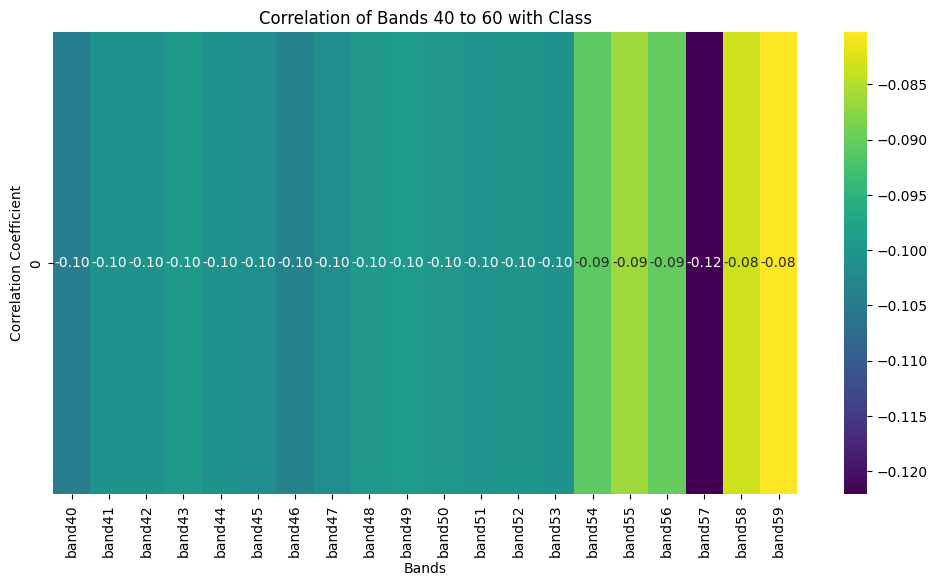

In [56]:
# Extracting pixel values and the 'class' column for bands 40 to 60
bands_40_to_60_and_class_df = df.iloc[:, 39:59]  # Adjust indices as needed

# Calculating the correlation matrix with class column
correlation_matrix_with_class_40_to_60 = bands_40_to_60_and_class_df.corrwith(df.iloc[:, -1])

# Visualizing the correlation with class column as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_with_class_40_to_60.to_frame().T, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Bands 40 to 60 with Class')
plt.xlabel('Bands')
plt.ylabel('Correlation Coefficient')
plt.show()

Text(270.72222222222223, 0.5, 'Correlation Coefficient')

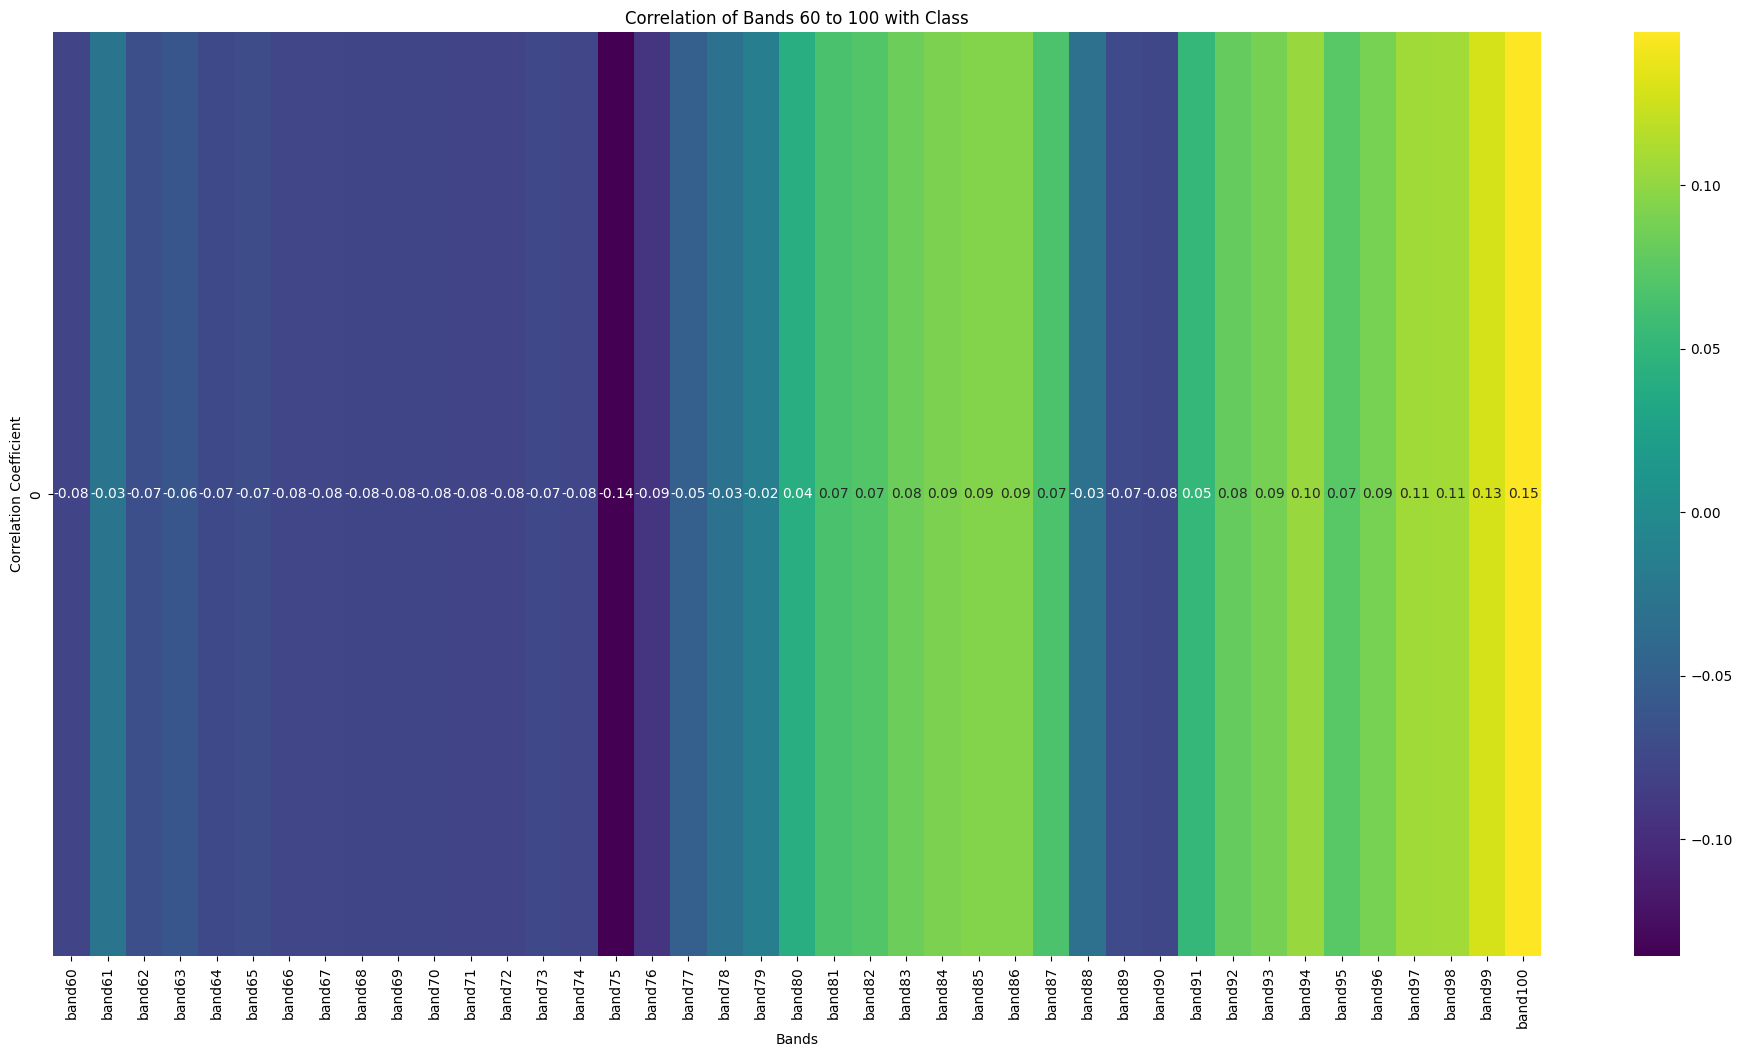

In [59]:
# Extracting pixel values and the 'class' column for bands 60 to 100
bands_60_to_100_and_class_df = df.iloc[:, 59:100]  # Adjust indices as needed

# Calculating the correlation matrix with class column
correlation_matrix_with_class_60_to_100 = bands_60_to_100_and_class_df.corrwith(df.iloc[:, -1])

# Visualizing the correlation with class as a heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix_with_class_60_to_100.to_frame().T, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Bands 60 to 100 with Class')
plt.xlabel('Bands')
plt.ylabel('Correlation Coefficient')

Text(270.72222222222223, 0.5, 'Correlation Coefficient')

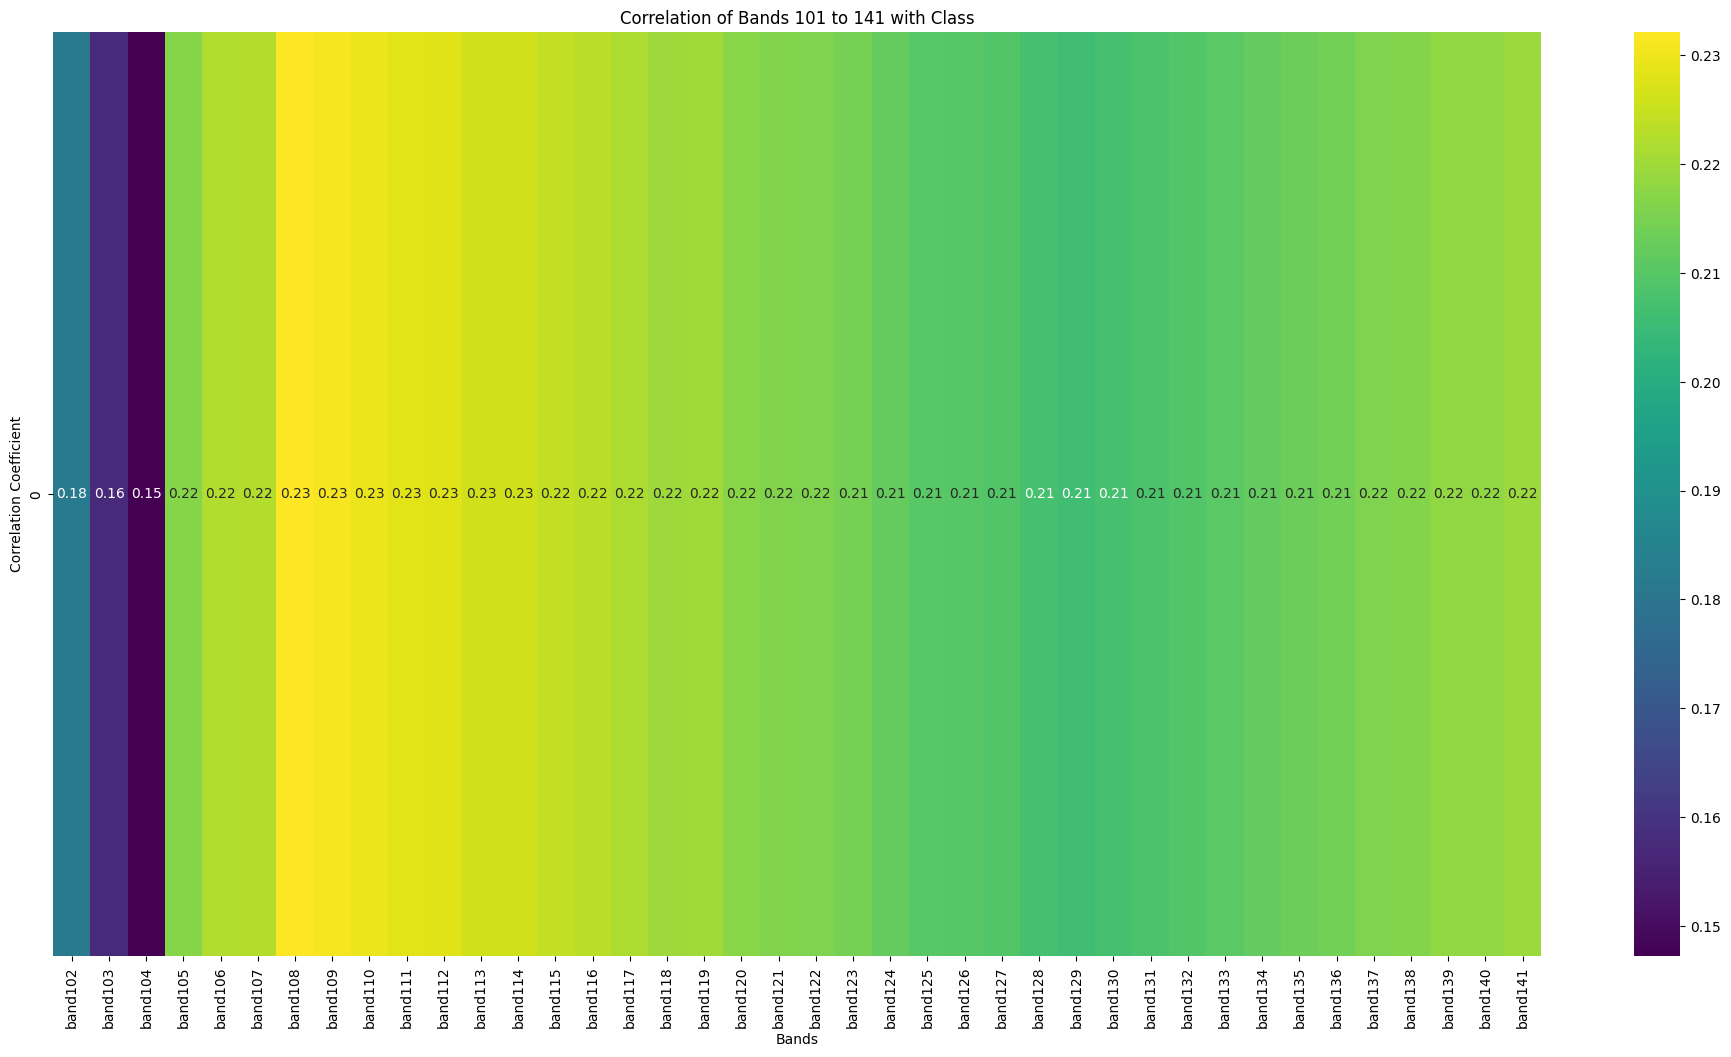

In [76]:
# Extracting pixel values and the 'class' column for bands 101 to 141
bands_101_to_141_and_class_df = df.iloc[:, 101:141]  # Adjust indices as needed

# Calculating the correlation matrix with class
correlation_matrix_with_class_101_to_141 = bands_101_to_141_and_class_df.corrwith(df.iloc[:, -1])

# Visualizing the correlation with class as a heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix_with_class_101_to_141.to_frame().T, cmap='viridis', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation of Bands 101 to 141 with Class')
plt.xlabel('Bands')
plt.ylabel('Correlation Coefficient')

In [75]:
# Extracting pixel values and the 'class' column for all bands
all_bands_and_class_df = df.iloc[:, :-1]

# Calculating the correlation coefficients with class
correlation_with_class = all_bands_and_class_df.corrwith(df.iloc[:, -1])

# Filtering bands with correlation coefficient >= 0.238
selected_bands = correlation_with_class[abs(correlation_with_class) >= 0.238]

# Display the selected bands and their correlation coefficients
print("Selected Bands with Correlation Coefficient >= 0.238:")
print(selected_bands)
selected_bands.shape


Selected Bands with Correlation Coefficient >= 0.238:
band147    0.245247
band148    0.245009
band149    0.242812
band150    0.242855
band151    0.238947
band153    0.238003
band155    0.239565
band184    0.238006
band185    0.241086
band188    0.238426
band190    0.239321
band191    0.238504
band192    0.239755
band193    0.241024
band194    0.242920
band195    0.238310
band196    0.240277
dtype: float64


(17,)

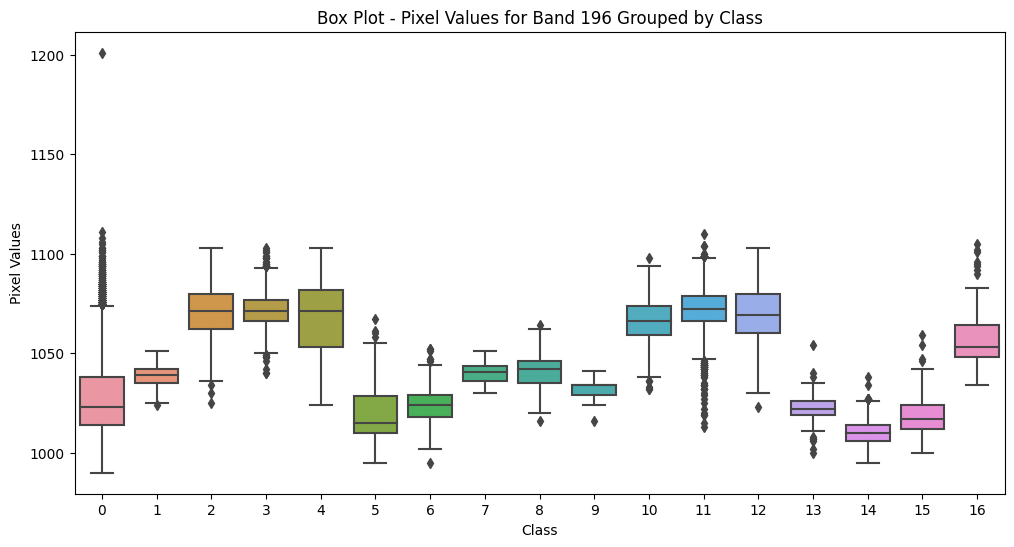

In [72]:
# Box plot for band grouped by object class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band196')
plt.title('Box Plot - Pixel Values for Band 196 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

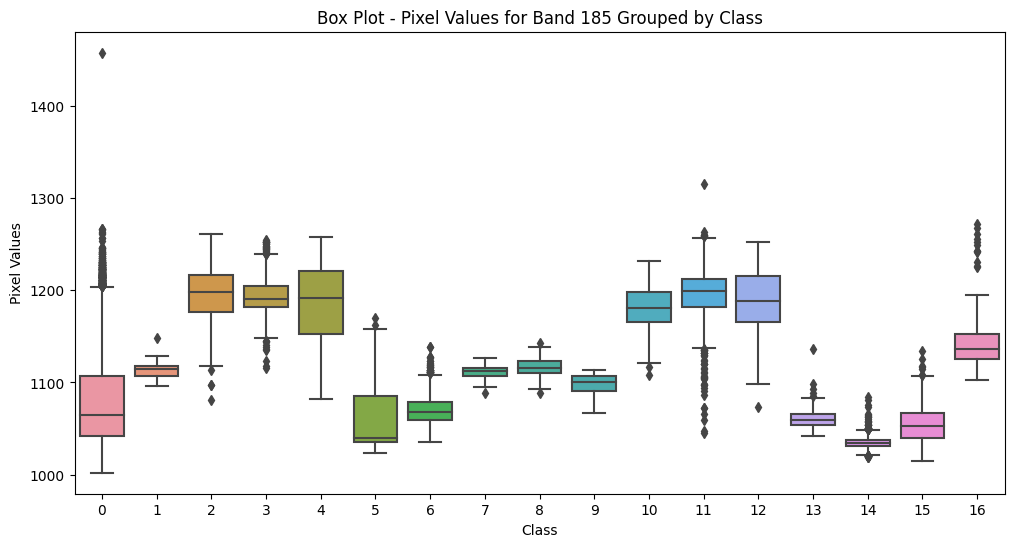

In [73]:
# Box plot for band grouped by object class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band185')
plt.title('Box Plot - Pixel Values for Band 185 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

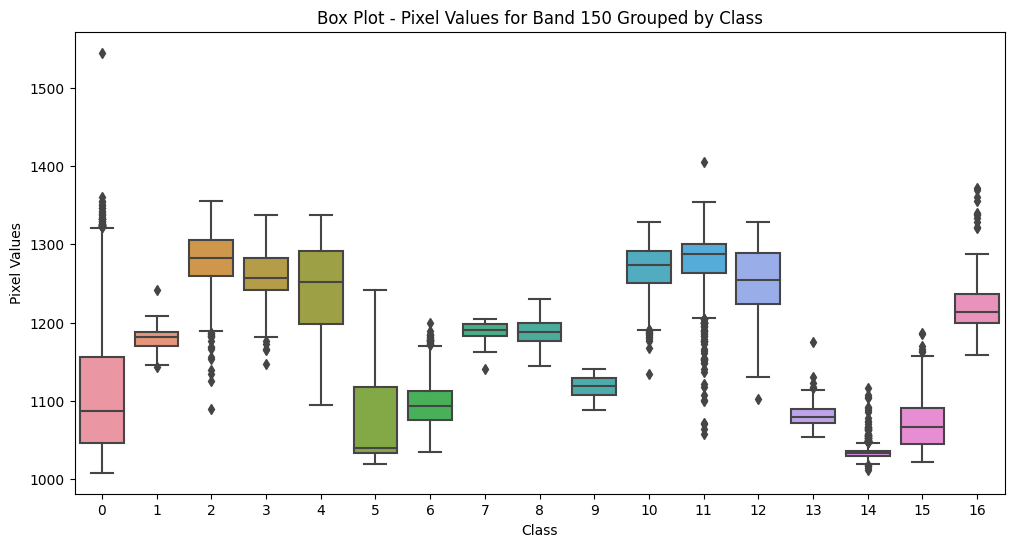

In [74]:
# Box plot for band grouped by object class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='band150')
plt.title('Box Plot - Pixel Values for Band 150 Grouped by Class')
plt.xlabel('Class')
plt.ylabel('Pixel Values')
plt.show()

## Principal Component Analysis(PCA)


STEPS

1. Estimate the basis of Principal components

2. Plot the cumulative explained variance associated with Principal components VS Number of components.

3. Select acordingly the no.of components for PCA projection

4. Reconstruct the images associated to the different bands using the selected principal components

[[ 0.6047628   0.21997468  0.8862633  ...  1.28472014  0.38894136
   1.62910551]
 [-1.06326446  0.75820528  0.87074869 ...  1.62021647  1.17937664
   1.62910551]
 [ 2.05583381  0.75820528  0.55657785 ...  1.47643233  1.26720278
   1.06179023]
 ...
 [ 0.55122814 -0.98670358  0.01744517 ... -1.30339441 -0.66497235
  -1.20747086]
 [ 0.55686337  0.05503305 -0.66519764 ... -0.91997003 -0.92845077
  -0.7819844 ]
 [ 1.03022246 -1.00406586 -0.31224028 ... -1.11168222 -1.01627691
  -1.20747086]]
Explained Variance Ratio: [0.6861814  0.19194106 0.0256119  0.01686552 0.01049086 0.00840367
 0.00470794 0.00392647 0.00372137 0.00346936 0.00284681 0.00245583
 0.00214131 0.001975   0.00185912 0.00180073 0.00174142 0.00157971
 0.00153976 0.00149655]


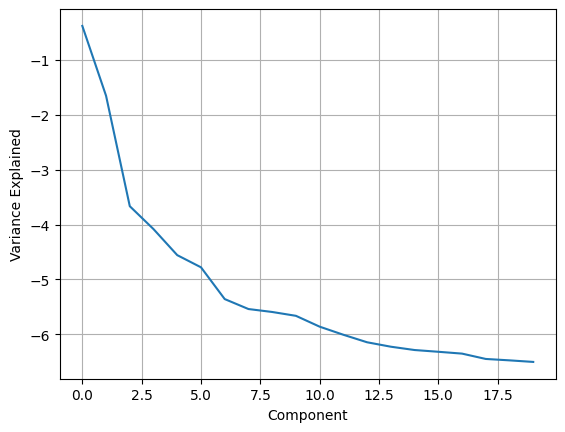

Cumulative Explained Variance:
PC1: 0.6861814043981024
PC2: 0.8781224595972164
PC3: 0.9037343598379062
PC4: 0.9205998778897495
PC5: 0.931090733410052
PC6: 0.9394944070284913
PC7: 0.9442023475142205
PC8: 0.9481288183816456
PC9: 0.951850192282146
PC10: 0.9553195487341412
PC11: 0.9581663593566626
PC12: 0.9606221902479057
PC13: 0.9627635043318594
PC14: 0.9647385046986438
PC15: 0.9665976228285516
PC16: 0.9683983519265029
PC17: 0.9701397687300205
PC18: 0.9717194814915988
PC19: 0.9732592397643759
PC20: 0.9747557865999071


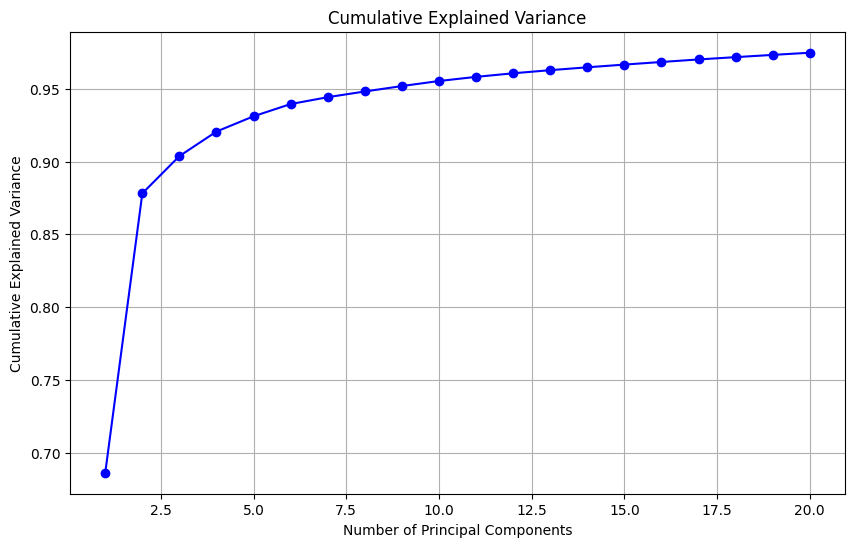

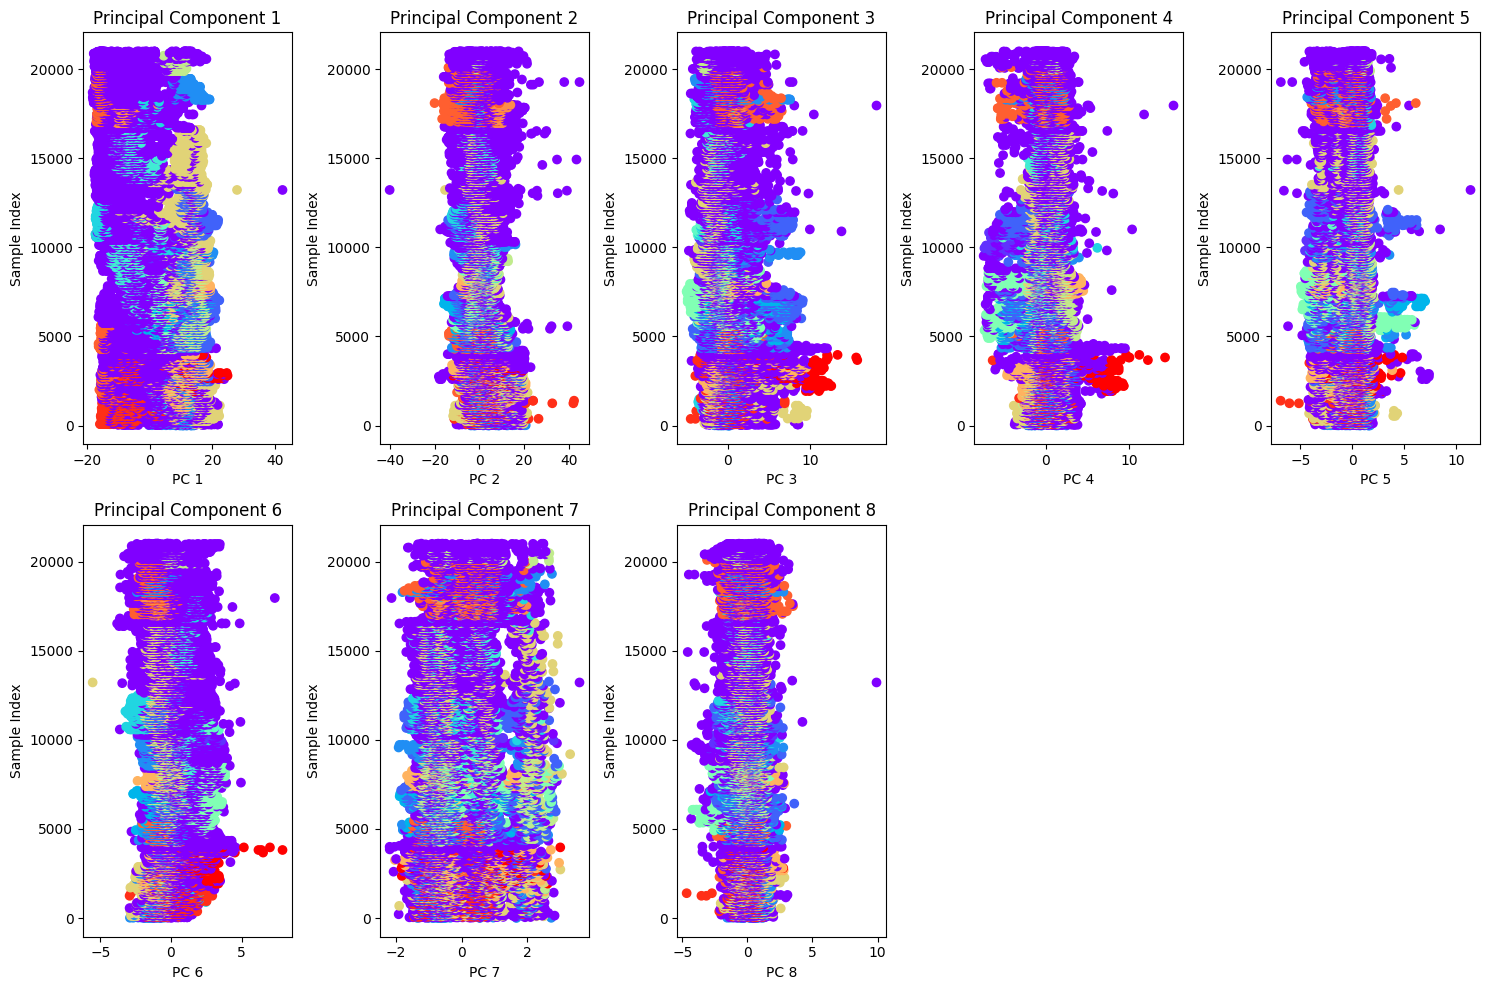

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# y represent the label or specie of the pine tree(target)

def f_PCA(X, n_components=200):
    # Reshape the data to 2D array (pixel values as features, using bands as samples)
    X_reshaped = X.reshape((-1, X.shape[2]))

    # Standardize the data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X_reshaped)
    print(X_std)
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)

    # Print the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", explained_variance_ratio)
    
    # Visualize the explained variance ratio
    plt.plot(np.log(explained_variance_ratio))
    plt.grid()
    plt.xlabel('Component')
    plt.ylabel('Variance Explained')
    plt.show()

    # Calculate cumulative explained variance
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Print cumulative explained variance
    print("Cumulative Explained Variance:")
    for i in range(n_components):
        print(f"PC{i + 1}: {cumulative_variance_ratio[i]}")

    # Visualize the cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
    plt.title('Cumulative Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    return X_pca

# Perform the PCA on 10 components, print the explained variance ratio, and visualize it 
X_pca = f_PCA(X, n_components=20)


# Visualize n pcs
# flatten the X_pca matrix
n_components=8
plt.figure(figsize=(15, 10))
for i in range(n_components):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X_pca[:, i], range(len(X_pca)), c=y.flatten(), cmap='rainbow')
    plt.title(f'Principal Component {i + 1}')
    plt.xlabel(f'PC {i + 1}')
    plt.ylabel('Sample Index')

plt.tight_layout()
plt.show()



In [17]:
X_pca.shape
# Assuming X_pca is the result of applying PCA
X_pca_five_components = X_pca[:, :8]
X_pca_five_components

array([[ 10.57398474,   4.21271342,   0.18836791, ...,  -1.26954048,
          0.55776157,   0.67205077],
       [ 13.15770743,  -1.95441227,   0.15436654, ...,  -0.78985221,
         -1.34508036,   0.70530662],
       [ 14.07035027,  -3.84390553,   0.10099179, ...,  -1.24878956,
          1.67495668,   0.16783901],
       ...,
       [-15.3038839 ,  -3.54400039,   0.64108542, ...,  -0.29546323,
          0.45823933,   0.89078177],
       [-15.37571036,   1.1407    ,   1.32109061, ...,  -1.06827971,
          0.48010697,   0.62535242],
       [-15.33317397,   0.18197926,   1.2422132 , ...,  -0.93559806,
          0.92522082,   0.54215253]])

##### Bands before PCA

## Plot reconstructed images in different bands

In [2]:
#fig = plt.figure(figsize = (20, 10))



#plt.savefig('IP_PCA_Bands.png')

In [15]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## Classification with RF (optional: comparison with other classifiers)

In [99]:
#Use the names below for the classes sorted


names = ['Alfalfa','Corn-notill', 'Corn-mintill','Corn','Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat','Woods','Buildings Grass Trees Drives','Stone Steel Towers']


#SPLIT DATA in TRAINING and testing

#Define classifier

#Fit and predict
#ypred = classifier.predict(X_test)

In [3]:
#PLOT THE CONFUSION MATRIX Associate to the classifier

#data = confusion_matrix(y_test, ypred)
#df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
#plt.savefig('cmap.png', dpi=300)

In [1]:
#print(classification_report(y_test, ypred, target_names = names))

## Classification Map

In [4]:
#Use the function below to produce the classification map


def reconstruct_classification_map(q, classifier):
    l=[]
    for i in range(q.shape[0]):
      if q.iloc[i, -1] == 0:
        l.append(0)
      else:
        l.append(classifier.predict(q.iloc[i, :-1].values.reshape(1, -1)))
    return l


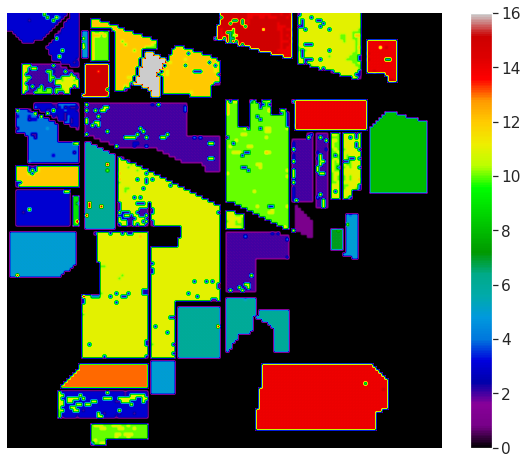

In [129]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()



---



---

